In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.types import DateType
from pyspark.sql.window import Window
import pyspark.sql.functions as F

In [28]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
df_airport = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/user/airport-traffic.csv")

In [5]:
df_airport.show(10, True)

+------------------+-------------------+-------+--------------------+-------------------+--------------------+------------+----------------+------------------+------------+--------------------+
|aggregation_method|               date|version|        airport_name|percent_of_baseline|   center_point_geom|        city|    state_region|country_iso_code_2|country_name|        airport_geom|
+------------------+-------------------+-------+--------------------+-------------------+--------------------+------------+----------------+------------------+------------+--------------------+
|             Daily|2020-07-05 00:00:00|    1.0|     Kingsford Smith|               52.0|POINT(151.1800877...|      Sydney| New South Wales|                AU|   Australia|POLYGON((151.1643...|
|             Daily|2020-07-05 00:00:00|    1.0|Calgary Internati...|              100.0|POINT(-114.013122...|     Calgary|         Alberta|             CA-AB|      Canada|POLYGON((-113.981...|
|             Daily|2020-07-05

In [6]:
df_airport.count()

7080

In [7]:
df_airport.printSchema()

root
 |-- aggregation_method: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- version: double (nullable = true)
 |-- airport_name: string (nullable = true)
 |-- percent_of_baseline: double (nullable = true)
 |-- center_point_geom: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state_region: string (nullable = true)
 |-- country_iso_code_2: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- airport_geom: string (nullable = true)



In [8]:
df_airport = df_airport.filter(df_airport['country_name'] == 'United States of America (the)').select('date', 'percent_of_baseline', 'city', 'state_region')

In [9]:
df_airport.show(10)

+-------------------+-------------------+-------------------+--------------+
|               date|percent_of_baseline|               city|  state_region|
+-------------------+-------------------+-------------------+--------------+
|2020-07-05 00:00:00|               39.0|        Los Angeles|    California|
|2020-07-05 00:00:00| 28.999999999999996|South San Francisco|    California|
|2020-07-05 00:00:00|               30.0|             Denver|      Colorado|
|2020-07-05 00:00:00|               47.0|      Miami Springs|       Florida|
|2020-07-05 00:00:00|               49.0|       College Park|       Georgia|
|2020-07-05 00:00:00|               71.0|     Urban Honolulu|        Hawaii|
|2020-07-05 00:00:00|               54.0|            Chicago|      Illinois|
|2020-07-05 00:00:00|  55.00000000000001|             Boston| Massachusetts|
|2020-07-05 00:00:00|               37.0|            Romulus|      Michigan|
|2020-07-05 00:00:00|               42.0|          Charlotte|North Carolina|

In [10]:
df_airport.count()

4339

In [11]:
df_counties = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/user/us-counties.csv")

In [12]:
df_counties.show(10)

+-------------------+-----------+----------+----------------+---------------+------+
|               date|     county|state_name|county_fips_code|confirmed_cases|deaths|
+-------------------+-----------+----------+----------------+---------------+------+
|2020-08-02 00:00:00|     Joplin|  Missouri|            null|            448|    20|
|2020-08-02 00:00:00|Kansas City|  Missouri|            null|           5929|    69|
|2020-08-03 00:00:00|     Joplin|  Missouri|            null|            453|    21|
|2020-08-03 00:00:00|Kansas City|  Missouri|            null|           6027|    69|
|2020-08-04 00:00:00|     Joplin|  Missouri|            null|            467|    21|
|2020-08-04 00:00:00|Kansas City|  Missouri|            null|           6137|    69|
|2020-08-05 00:00:00|     Joplin|  Missouri|            null|            477|    21|
|2020-08-05 00:00:00|Kansas City|  Missouri|            null|           6268|    69|
|2020-08-06 00:00:00|     Joplin|  Missouri|            null|    

In [13]:
df_states = df_counties.groupBy('state_name','date').agg(sum('confirmed_cases').alias('confirmed_cases'), sum('deaths').alias('deaths'))
df_states.show(10)

+--------------------+-------------------+---------------+------+
|          state_name|               date|confirmed_cases|deaths|
+--------------------+-------------------+---------------+------+
|            New York|2020-08-22 00:00:00|         433881| 32464|
|                Iowa|2020-08-02 00:00:00|          45723|   878|
|              Hawaii|2020-04-08 00:00:00|            433|     5|
|Northern Mariana ...|2020-09-16 00:00:00|             61|     2|
|            New York|2020-10-29 00:00:00|         507913| 33128|
|                Iowa|2020-11-02 00:00:00|         132697|  1755|
|                Iowa|2020-06-07 00:00:00|          21794|   606|
|                Utah|2020-07-02 00:00:00|          23466|   176|
|               Maine|2020-10-31 00:00:00|           6668|   147|
|               Maine|2020-05-18 00:00:00|           1713|    71|
+--------------------+-------------------+---------------+------+
only showing top 10 rows



In [14]:
df_airport = df_airport.withColumn('state_name', df_airport['state_region']).select('date', 'percent_of_baseline', 'city', 'state_name')
df_airport.show(10)

+-------------------+-------------------+-------------------+--------------+
|               date|percent_of_baseline|               city|    state_name|
+-------------------+-------------------+-------------------+--------------+
|2020-07-05 00:00:00|               39.0|        Los Angeles|    California|
|2020-07-05 00:00:00| 28.999999999999996|South San Francisco|    California|
|2020-07-05 00:00:00|               30.0|             Denver|      Colorado|
|2020-07-05 00:00:00|               47.0|      Miami Springs|       Florida|
|2020-07-05 00:00:00|               49.0|       College Park|       Georgia|
|2020-07-05 00:00:00|               71.0|     Urban Honolulu|        Hawaii|
|2020-07-05 00:00:00|               54.0|            Chicago|      Illinois|
|2020-07-05 00:00:00|  55.00000000000001|             Boston| Massachusetts|
|2020-07-05 00:00:00|               37.0|            Romulus|      Michigan|
|2020-07-05 00:00:00|               42.0|          Charlotte|North Carolina|

In [15]:
df_airport_state = df_airport.groupBy('state_name','date').agg(avg('percent_of_baseline').alias('percent_of_baseline'))
df_airport_state.show(10)

+----------+-------------------+-------------------+
|state_name|               date|percent_of_baseline|
+----------+-------------------+-------------------+
|   Georgia|2020-07-23 00:00:00|               66.0|
|  Virginia|2020-10-20 00:00:00|               73.0|
|California|2020-03-21 00:00:00|               73.0|
|    Nevada|2020-08-02 00:00:00|               34.0|
|  Michigan|2020-03-16 00:00:00|               73.0|
|    Hawaii|2020-04-08 00:00:00|               86.0|
|    Hawaii|2020-05-16 00:00:00|               73.0|
|  Illinois|2020-05-03 00:00:00|               53.0|
|New Jersey|2020-06-05 00:00:00|               74.0|
|  New York|2020-10-29 00:00:00|               70.5|
+----------+-------------------+-------------------+
only showing top 10 rows



In [16]:
df_airport_final = df_airport_state.join(df_states, ['state_name', 'date'])
df_airport_final.show(10)

+-------------+-------------------+-------------------+---------------+------+
|   state_name|               date|percent_of_baseline|confirmed_cases|deaths|
+-------------+-------------------+-------------------+---------------+------+
|     New York|2020-08-22 00:00:00|               60.5|         433881| 32464|
|       Hawaii|2020-04-08 00:00:00|               86.0|            433|     5|
|     New York|2020-10-29 00:00:00|               70.5|         507913| 33128|
|      Georgia|2020-06-23 00:00:00|               62.0|          64577|  2646|
|      Georgia|2020-07-23 00:00:00|               66.0|         143857|  3288|
|     Illinois|2020-05-03 00:00:00|               53.0|          61499|  2632|
|   New Jersey|2020-06-05 00:00:00|               74.0|         163336| 12049|
|Massachusetts|2020-09-16 00:00:00|               75.0|         125699|  9245|
|   California|2020-03-21 00:00:00|               73.0|           1544|    28|
|       Hawaii|2020-09-26 00:00:00|               94

In [17]:
df_airport_final = df_airport_final.select('state_name', 'percent_of_baseline', 'confirmed_cases', 'deaths', df_airport_final['date'].cast(DateType()).alias('date'))

In [18]:
window = Window.partitionBy('state_name').orderBy('date')
df_airport_final_l = df_airport_final.withColumn('confirmed_last', lag('confirmed_cases', 1).over(window))
df_airport_final_a = df_airport_final_l.withColumn('new_confirmed', df_airport_final_l['confirmed_cases'] - df_airport_final_l['confirmed_last'])
df_airport_final_a.show(10)

+----------+-------------------+---------------+------+----------+--------------+-------------+
|state_name|percent_of_baseline|confirmed_cases|deaths|      date|confirmed_last|new_confirmed|
+----------+-------------------+---------------+------+----------+--------------+-------------+
|    Hawaii|               95.0|             10|     0|2020-03-16|          null|         null|
|    Hawaii|               95.0|             14|     0|2020-03-17|            10|            4|
|    Hawaii|               90.0|             16|     0|2020-03-18|            14|            2|
|    Hawaii|               93.0|             26|     0|2020-03-19|            16|           10|
|    Hawaii|               86.0|             37|     0|2020-03-20|            26|           11|
|    Hawaii|               94.0|             48|     0|2020-03-21|            37|           11|
|    Hawaii|              100.0|             56|     0|2020-03-22|            48|            8|
|    Hawaii|               98.0|        

In [19]:
df_airport_final_l_d = df_airport_final_a.withColumn('deaths_last', lag('deaths', 1).over(window))
df_airport_final_a_d = df_airport_final_l_d.withColumn('new_deaths', df_airport_final_l_d['deaths'] - df_airport_final_l_d['deaths_last'])
df_airport_final_a_d.show(10)

+----------+-------------------+---------------+------+----------+--------------+-------------+-----------+----------+
|state_name|percent_of_baseline|confirmed_cases|deaths|      date|confirmed_last|new_confirmed|deaths_last|new_deaths|
+----------+-------------------+---------------+------+----------+--------------+-------------+-----------+----------+
|    Hawaii|               95.0|             10|     0|2020-03-16|          null|         null|       null|      null|
|    Hawaii|               95.0|             14|     0|2020-03-17|            10|            4|          0|         0|
|    Hawaii|               90.0|             16|     0|2020-03-18|            14|            2|          0|         0|
|    Hawaii|               93.0|             26|     0|2020-03-19|            16|           10|          0|         0|
|    Hawaii|               86.0|             37|     0|2020-03-20|            26|           11|          0|         0|
|    Hawaii|               94.0|             48|

In [20]:
df_airport_final = df_airport_final_a_d.select('state_name', 'percent_of_baseline', 'date', 'new_confirmed', 'new_deaths')
df_airport_final.show(10)

+----------+-------------------+----------+-------------+----------+
|state_name|percent_of_baseline|      date|new_confirmed|new_deaths|
+----------+-------------------+----------+-------------+----------+
|    Hawaii|               95.0|2020-03-16|         null|      null|
|    Hawaii|               95.0|2020-03-17|            4|         0|
|    Hawaii|               90.0|2020-03-18|            2|         0|
|    Hawaii|               93.0|2020-03-19|           10|         0|
|    Hawaii|               86.0|2020-03-20|           11|         0|
|    Hawaii|               94.0|2020-03-21|           11|         0|
|    Hawaii|              100.0|2020-03-22|            8|         0|
|    Hawaii|               98.0|2020-03-23|           21|         0|
|    Hawaii|               97.0|2020-03-24|           13|         0|
|    Hawaii|               98.0|2020-03-25|            5|         0|
+----------+-------------------+----------+-------------+----------+
only showing top 10 rows



In [21]:
df_airport_final.groupBy('state_name').count().show()

+--------------+-----+
|    state_name|count|
+--------------+-----+
|        Hawaii|  255|
|         Texas|  256|
|        Nevada|  255|
|    Washington|  255|
|      Illinois|  255|
|       Georgia|  256|
|      Michigan|  255|
|      Virginia|  255|
|North Carolina|  255|
|    New Jersey|  255|
| Massachusetts|  255|
|       Florida|  255|
|    California|  256|
|      New York|  256|
|      Colorado|  255|
+--------------+-----+



In [25]:
df_HI = df_airport_final.filter(df_airport_final['state_name'] == 'Hawaii').toPandas()
df_TX = df_airport_final.filter(df_airport_final['state_name'] == 'Texas').toPandas()
df_NV = df_airport_final.filter(df_airport_final['state_name'] == 'Nevada').toPandas()
df_WA = df_airport_final.filter(df_airport_final['state_name'] == 'Washington').toPandas()
df_IL = df_airport_final.filter(df_airport_final['state_name'] == 'Illinois').toPandas()
df_GA = df_airport_final.filter(df_airport_final['state_name'] == 'Georgia').toPandas()
df_MI = df_airport_final.filter(df_airport_final['state_name'] == 'Michigan').toPandas()
df_VA = df_airport_final.filter(df_airport_final['state_name'] == 'Virginia').toPandas()
df_NC = df_airport_final.filter(df_airport_final['state_name'] == 'North Carolina').toPandas()
df_NJ = df_airport_final.filter(df_airport_final['state_name'] == 'New Jersey').toPandas()
df_MA = df_airport_final.filter(df_airport_final['state_name'] == 'Massachusetts').toPandas()
df_FL = df_airport_final.filter(df_airport_final['state_name'] == 'Florida').toPandas()
df_CA = df_airport_final.filter(df_airport_final['state_name'] == 'California').toPandas()
df_NY = df_airport_final.filter(df_airport_final['state_name'] == 'New York').toPandas()
df_CO = df_airport_final.filter(df_airport_final['state_name'] == 'Colorado').toPandas()

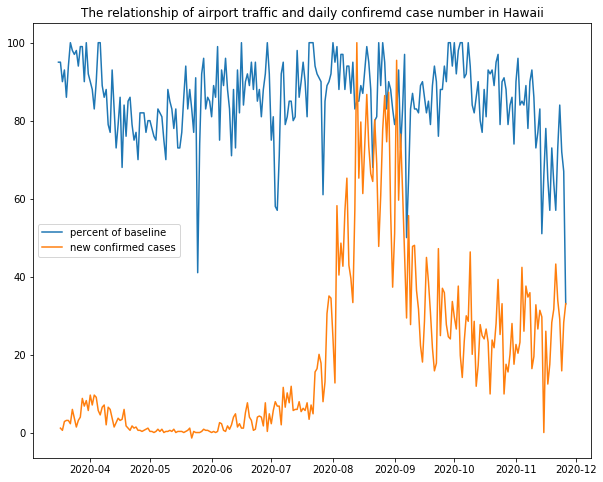

In [45]:
df = df_HI
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

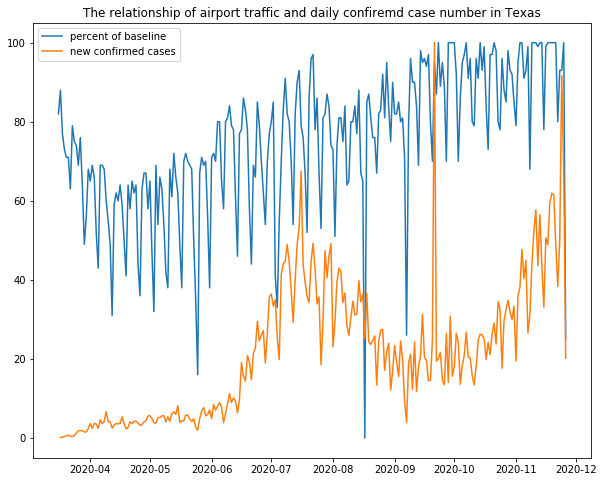

In [44]:
df = df_TX
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

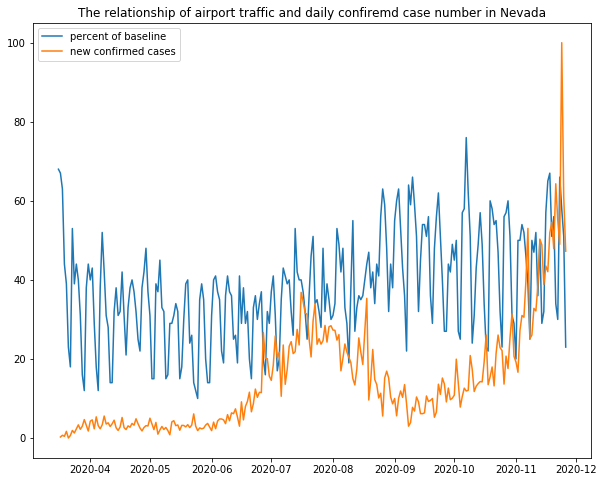

In [46]:
df = df_NV
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

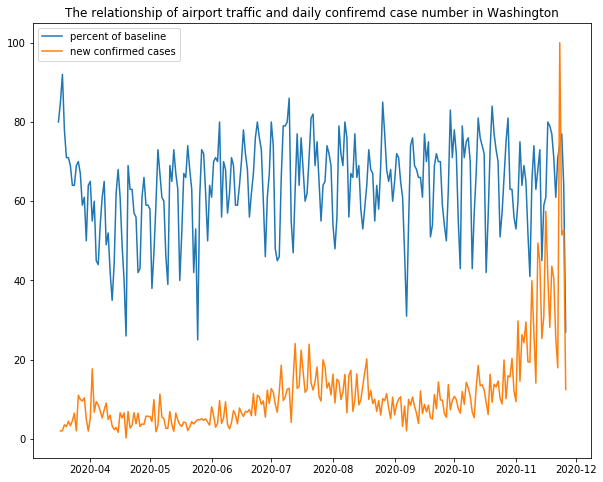

In [47]:
df = df_WA
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

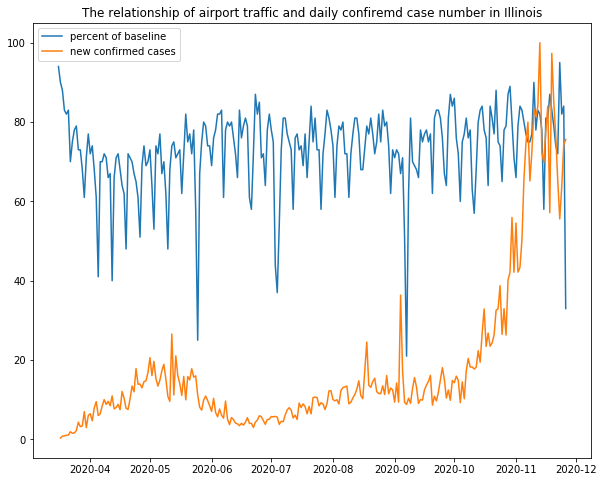

In [48]:
df = df_IL
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

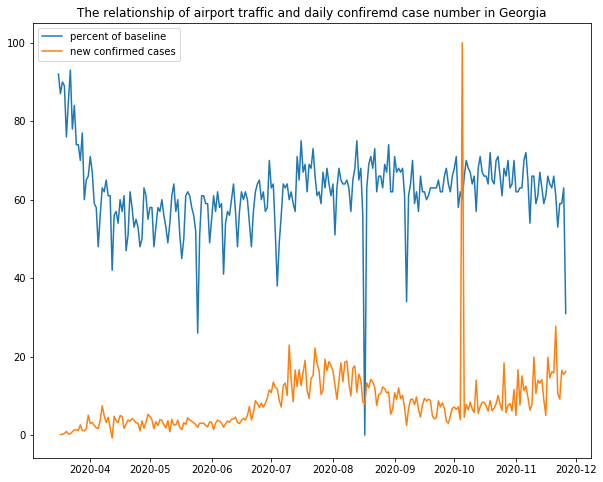

In [49]:
df = df_GA
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

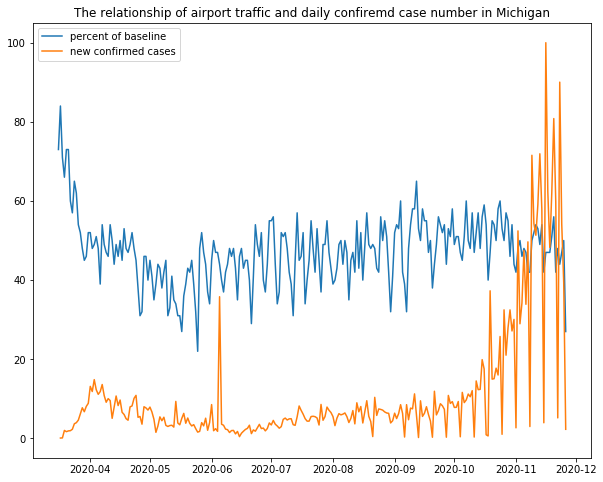

In [50]:
df = df_MI
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

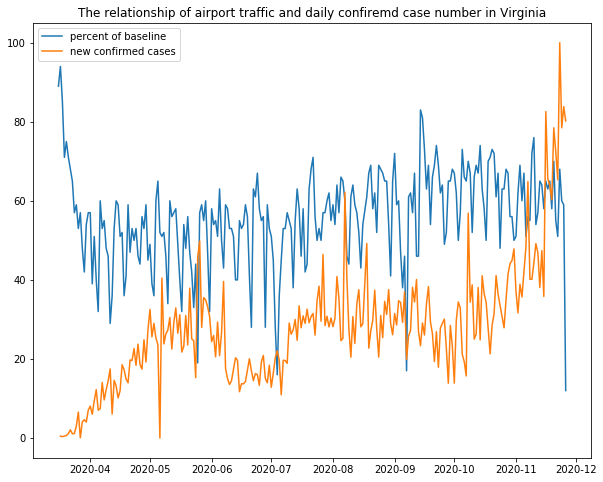

In [51]:
df = df_VA
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

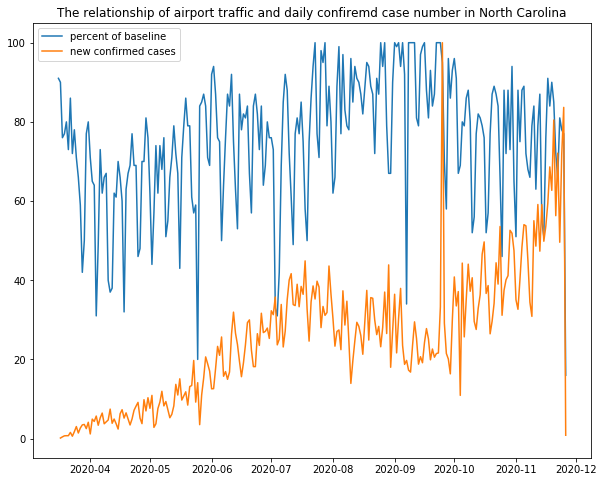

In [52]:
df = df_NC
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

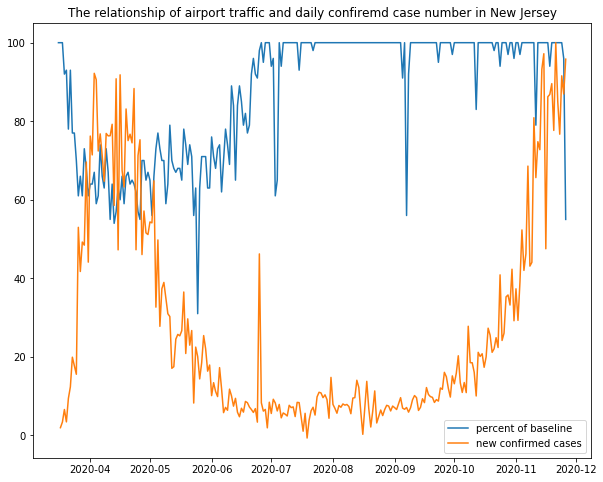

In [53]:
df = df_NJ
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

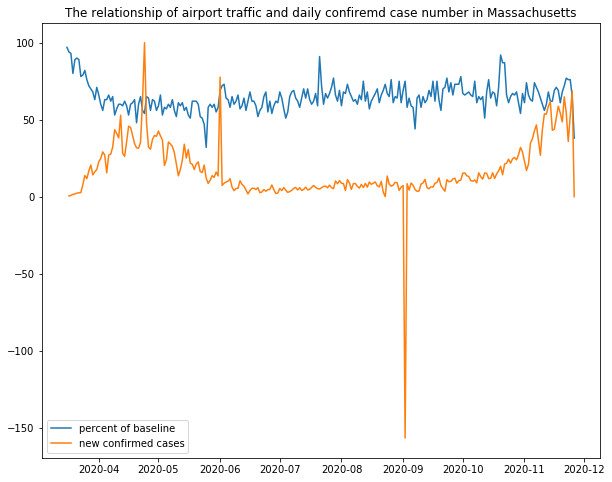

In [55]:
df = df_MA
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

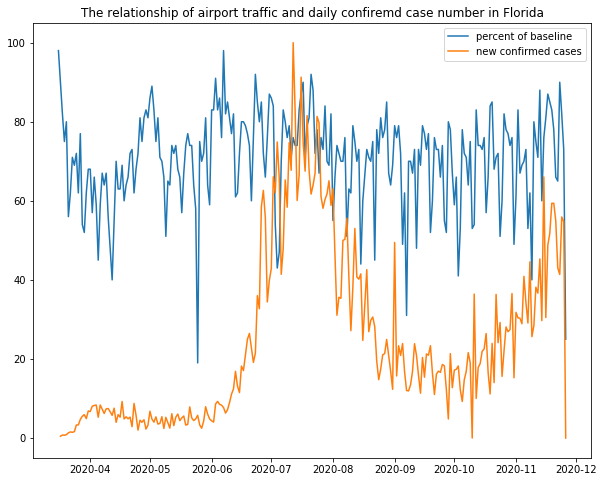

In [56]:
df = df_FL
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

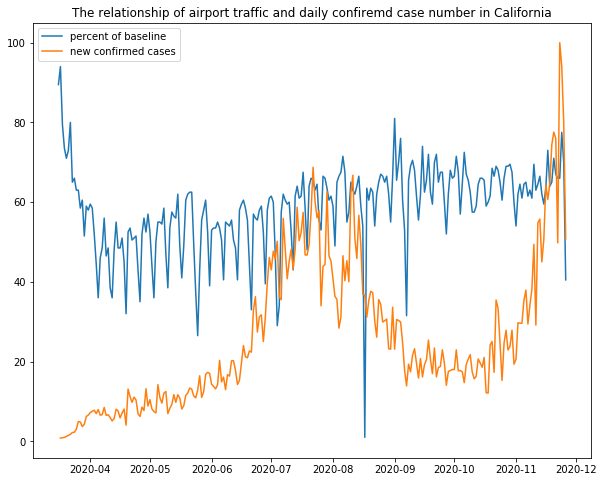

In [57]:
df = df_CA
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

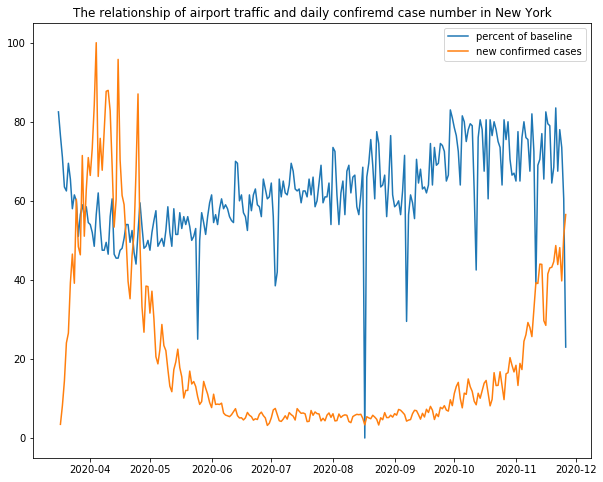

In [58]:
df = df_NY
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()

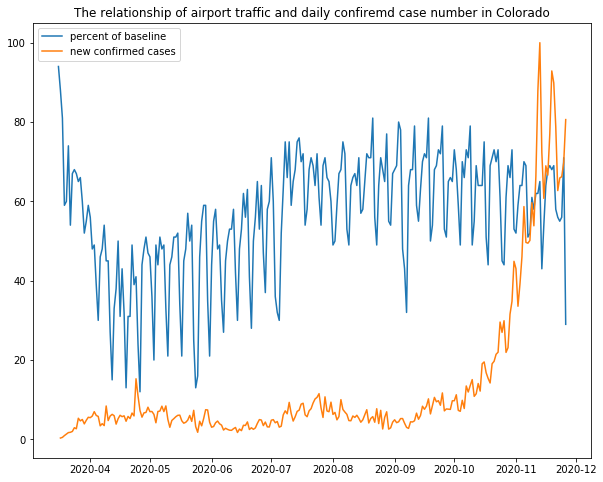

In [59]:
df = df_CO
plt.plot(df['date'], df['percent_of_baseline'], label='percent of baseline')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['state_name'][0]))
plt.show()